# World population distribution

This dataset contains the `population` for each world `region` from 1800 through 2100 (projected).

The four regions are defined by Gapminder.org. The regions are Africa, Asia, Europe, and the Americas.

This csv also contains global data (`region` is 'world') and other indicators including `life_expectancy`, `child_mortality` rates (per 1000), average number of `babies_per_woman`, and average `income_per_person` (in adjusted USD). See the README for details.

### Project Ideas

#### Horizontal Bar plot

- In the `year` 2000, there were roughly 6 billion people on earth. If you had blocks that each represented 1 billion people, how many blocks would you predict belong in each `region` (africa, asia, europe, americas)?

- Follow the Pro Tips for horizontal bar plots.

#### Line Plot

- Create a line plot with year on the x-axis and population on y-axis for each `region`.

- Follow the Pro Tips for line plots.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('world-indicators.csv')
df

,year,region,population,life_expectancy,child_mortality,babies_per_woman,income_per_person
0,1800,africa,81209567,30.091575,443.51,6.58,437.699298
1,1801,africa,81313551,30.016479,443.47,6.58,437.322912
2,1802,africa,81418900,30.019117,443.44,6.58,436.949999
3,1803,africa,81525621,30.099188,443.41,6.58,436.501460
4,1804,africa,81633731,30.101720,443.37,6.58,436.033849
...,...,...,...,...,...,...,...
1500,2096,world,10225850874,83.170480,12.00,1.81,43370.546400
1501,2097,world,10215549310,83.280416,11.00,1.81,43731.659780
1502,2098,world,10204489862,83.393080,11.00,1.80,44094.151440
1503,2099,world,10192689066,83.506378,11.00,1.80,44457.765070


In [11]:
#Only getting the regions we want and summing their populations
region_query = df.query("(region == 'africa' | region == 'americas' | region == 'asia' | region == 'europe') & (year == 2000)")
solution = region_query.groupby('region')['population'].sum().reset_index()
solution = solution.sort_values(by='population', ascending=True)
solution

,region,population
3,europe,808067066
1,americas,828364943
0,africa,829384936
2,asia,3695909978


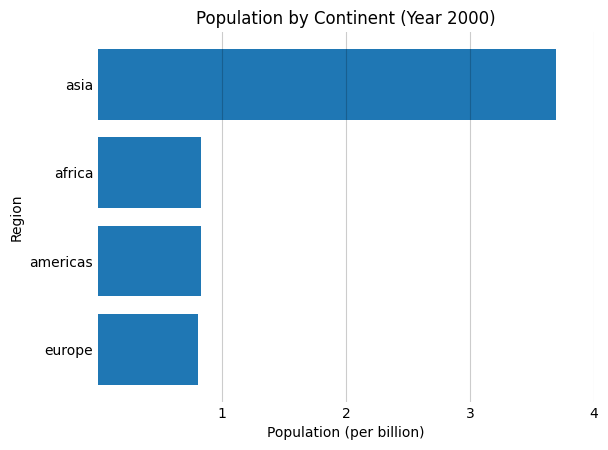

In [12]:
def clean_bar_axes( ):
    ax = plt.gca()
    ax.spines[['top', 'bottom', 'right' , 'left']].set_visible(False)
    ax.grid(axis='x', color='black', alpha=0.2)
    ax.tick_params(axis='both', length=0)
    ax.set_xticks([1, 2, 3, 4])

#Making the bar chart
solution['population']   = solution['population'] / 1e9  # Convert to billions
plt.barh(solution['region'], solution['population'])
plt.xlabel('Population (per billion)')
plt.ylabel('Region')
plt.title('Population by Continent (Year 2000)')
clean_bar_axes()


- In the `year` 2000, there were roughly 6 billion people on earth. If you had blocks that each represented 1 billion people, how many blocks would you predict belong in each `region` (africa, asia, europe, americas)?

Based on our chart, here are the number of blocks per region:
Asia: 3 blocks
Africa, America, Europe: 0 blocks

Explanation:
The population of the last 3 regions did not reach the billion mark according to the graph, so technically, they cannot be represent by a block.

In [34]:
def clean_axes( ):
    ax = plt.gca()
    ax.spines[['top', 'left', 'right']].set_visible(False)
    ax.grid(axis='y', alpha=0.2)
    ax.tick_params(axis='y', length=0)



df_pivot = df.pivot_table(values='population', index='year', columns='region', aggfunc='sum').reset_index()
df_pivot = df_pivot.set_index('year')   

# Delete the 'world' column to focus on continents only
df_pivot = df_pivot.drop('world', axis=1)

df_pivot




region,africa,americas,asia,europe
year,,,,
1800,81209567,23556679,672521875,206910570
1801,81313551,23817319,674654640,207842812
1802,81418900,24087376,676807276,208785186
1803,81525621,24367066,678979750,209737823
1804,81633731,24656605,681172043,210700861
...,...,...,...,...
2096,3751829414,1097157450,4686523734,681699726
2097,3767448939,1094294136,4665879849,679322405
2098,3782475092,1091411644,4645089450,676946774


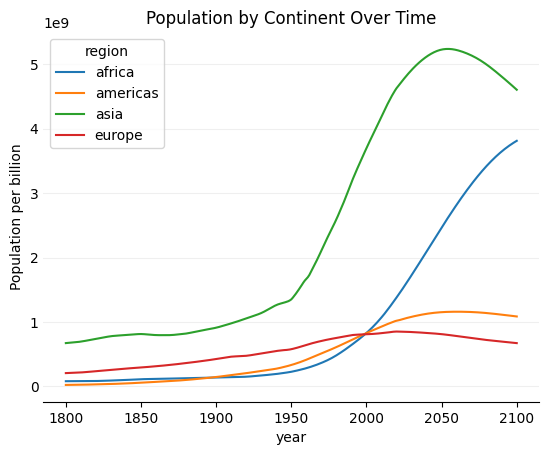

In [36]:
# Create a line plot with year on the x-axis and population on y-axis for each `region`.
df_pivot.plot()
plt.ylabel('Population per billion')
plt.title('Population by Continent Over Time')
clean_axes()